In [1]:
import numpy as np

from math import pi
import math

import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from scipy.interpolate import griddata
from scipy.interpolate import interp1d
import scipy.signal
from numpy import linalg as LA
#from matplotlib.mlab import griddata
params = {'legend.fontsize': 15,
          'legend.loc':'best',
          'figure.figsize': (14,5),
          'lines.markerfacecolor':'none',
         'axes.labelsize': 17,
         'axes.titlesize': 17,
         'xtick.labelsize':15,
         'ytick.labelsize':15,
         'grid.alpha':0.6}
pylab.rcParams.update(params)
#%matplotlib notebook
%matplotlib inline

## Define directories

In [2]:
vtu_dir = '../vtu/'
meshfile_dir = '../../geo/'

## Import VTK files

In [3]:
import vtkreader as reader

In [4]:
start = 50.00
end = 150.00
dt = 0.02

time = np.arange(start, end, dt)
filename = []
for i in range(len(time)):
    filename.append(vtu_dir+"{:.2f}".format(time[i])+'.vtu')

x,y = reader.load_coordinate(filename[0])


p = np.zeros([len(time),len(x)])    # only p is interested here

for i in range(len(time)):
    p[i],u,v,rho = reader.load_vtkFile(filename[i])
    if time[i] == end:
        print('loading data: done!')
        




## Trailling Edge Directivity

In [5]:
import basis
import directivity

In [6]:
dp,dpmean,dptuda = basis.fluc_pressure(p,time)
dptuda_ms,dptuda_rms = basis.rms(dptuda,time)

#xt = 0.0
xt = 0.9806050635537246
yt = 0


deg = -pi/60
xt,yt = basis.rotate(xt,yt,deg)
print(xt,yt)

## set the new centre point of the cordinate to this point
xn = x - xt
yn = y - yt

theta,r = basis.polar_coor(xn,yn)

rr = r #/ (1 - 0.2*np.cos(theta))
#rr = r * np.sqrt(1-0.2**2*np.cos(theta))



0.9792611783946352 -0.05132090369775688


Text(0.5, 1.05, 'Measured at trailing edge point, r = 3, $\\Delta\\tilde{p}_{rms}$')

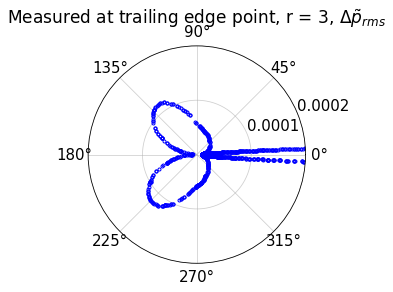

In [7]:
#a
dptuda_rms_plot,theta_plot1 = directivity.plot_routine(rr,theta,r,dptuda_rms)

plt.polar(theta_plot1,dptuda_rms_plot,'b.')
plt.ylim([0,0.0002])
plt.yticks([0.0001, 0.0002])  # Less radial ticks
plt.grid(True)

plt.title('Measured at trailing edge point, r = 3, $\Delta\\tilde{p}_{rms}$', va='bottom')

## Extract wall Meshes

In [8]:
import extractWallMesh as EM

308
364
364


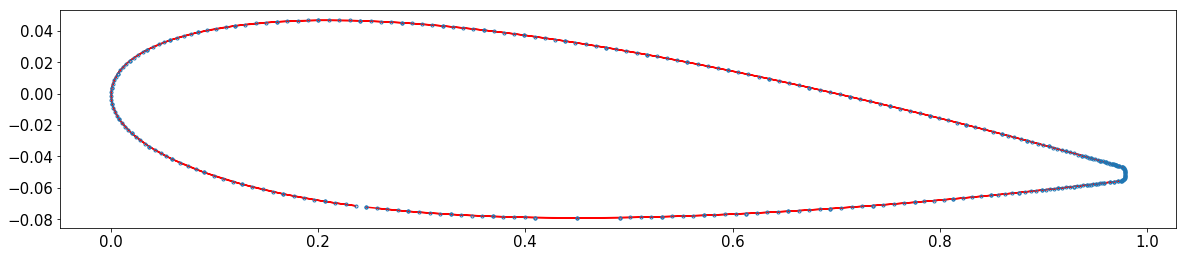

In [9]:
meshfilename = meshfile_dir+'nek_newv2.msh'
walltag = 4
xwall_,ywall_ = EM.ReadWallMesh(meshfilename,walltag)
xwall,ywall,pwall = EM.MeshPointExtraction(xwall_,ywall_,x,y,p)

## cp,cl

In [10]:
import coeff
cd,cl,cp,xt,yt,theta = coeff.cal_cp_cl_cd(pwall,xwall,ywall,time)

2.004304942275819


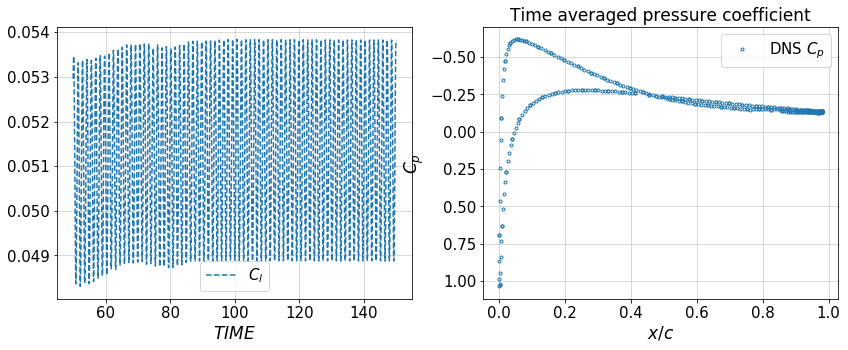

In [11]:
plt.figure(figsize=(14,5))
ax = plt.subplot(1,2,1)

ap = ax.plot(time,cl,'--',label='$C_l$')
#ap = ax.plot(time,cd,'.',label='$C_d$')


ap = ax.legend(loc='best')
ap = plt.xlabel('$TIME$')


plt.grid()
ax = plt.subplot(1,2,2)
ap = ax.plot(xt,cp,'.',label='DNS $C_p$')
#ap = ax.plot(x_cp_Alex,cp_Alex,'-.',label='From Alex')
#ap = ax.plot(x_cp_xfoil,cp_xfoil,'.',label='From Xfoil')

plt.gca().invert_yaxis()
ap = plt.xlabel('$x/c$')
ap = plt.ylabel('$C_p$')
ap = ax.legend(loc='best')
#plt.xlim([0,180])
#plt.xlim([50,60])
#plt.ylim([-1,-0.5])
plt.title('Time averaged pressure coefficient')
plt.grid()

#print((theta_t+pi)/pi*180)
#print(cp)
#print('cl amplitude = '+str(max(cl_nek)))
#print('cd amplitude = '+str((max(cd_nek)-min(cd_nek))/2))
#print('cd mean = '+str((max(cd_nek)+min(cd_nek))/2))

## PSD

In [12]:
dp,dpmean,dptuda = basis.fluc_pressure(pwall,time)

In [13]:
# varibles xwall,ywall,pwall
# select one point on the aerofoil to do the power spectrum
loc = int(len(xwall)/2)

print(str(xwall[loc])+','+str(ywall[loc]))
p_psd = np.asarray([])
for i in range(len(time)):
    p_psd = np.concatenate((p_psd,dptuda[i][loc]),axis = None)

0.18643908,-0.0664184


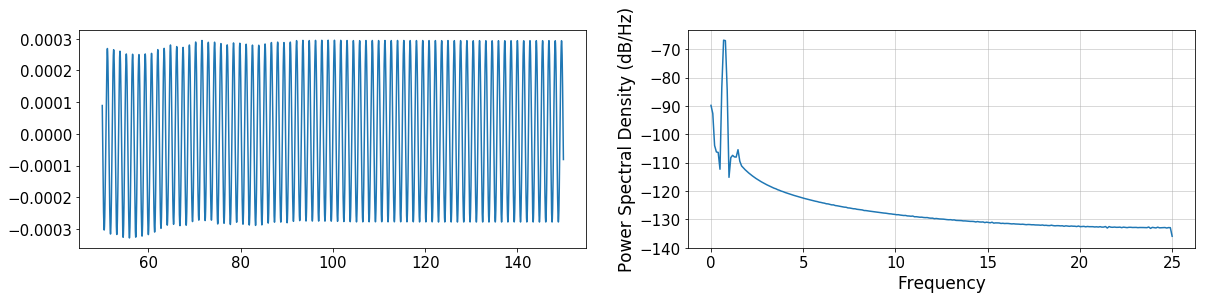

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.gridspec as gridspec

#dt = 1/len(time_phsical)
dt = 0.02
numFFT = 512

fig, (ax0, ax1) = plt.subplots(1, 2,figsize=(20,4))
ax0.plot(time, p_psd)
ax1.psd(p_psd, NFFT=numFFT, Fs=1/dt,noverlap=numFFT*0.75,window=np.hamming(numFFT))  #hamming,bartlett,blackman

plt.show()

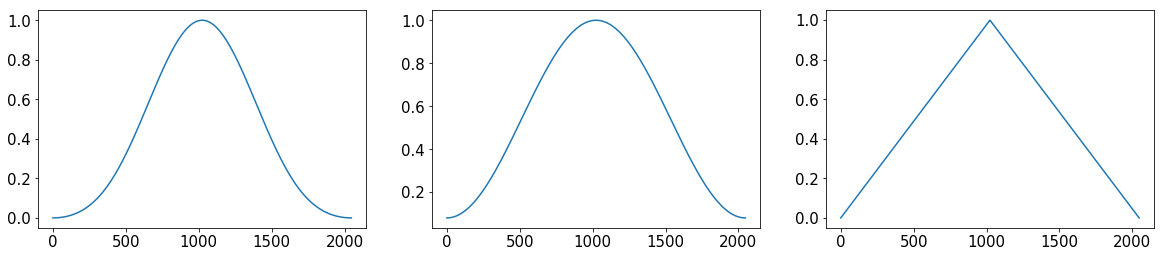

In [15]:
fig, (ax0, ax1, ax2) = plt.subplots(1, 3,figsize=(20,4))
ax0.plot(np.blackman(2048))
ax1.plot(np.hamming(2048))
ax2.plot(np.bartlett(2048))